In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#读取数据
data = pd.read_csv("E:\machineLearning\kaggle\dataset\creditCard.csv")
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
#数据比例
#count_classes = pd.value_counts(data['Class'], sort=True).sort_index()
#count_classes.plot(kind = 'bar')
#plt.title("Fraud class histogram")
#plt.xlabel("Class")
#plt.ylabel("Frequency")

In [3]:
#特征标准化
from sklearn.preprocessing import StandardScaler
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['Time', 'Amount'], axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [4]:
#下采样
#特征，不包含标签
X = data.loc[:, data.columns != 'Class']
y = data.loc[:, data.columns == 'Class']
number_records_fraud = len(data[data.Class == 1])
#所有异常样本索引
fraud_indices = np.array(data[data.Class == 1].index) 
#所有正常样本索引
normal_indices = data[data.Class == 0].index
#随机采样指定个数正常样本，取其索引
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace=False)
random_normal_indices = np.array(random_normal_indices)
#正常和异常样本索引
under_sample_indices = np.concatenate([fraud_indices, random_normal_indices])
#根据索引下采样
under_sample_data = data.iloc[under_sample_indices,:]
X_undersample = under_sample_data.loc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.loc[:, under_sample_data.columns == 'Class']
#打印比例
print("normal:", len(under_sample_data[under_sample_data.Class == 0]) / len(under_sample_data))
print("abnormal:", len(under_sample_data[under_sample_data.Class == 1]) / len(under_sample_data))
print("all samples:", len(under_sample_data))

normal: 0.5
abnormal: 0.5
all samples: 984


In [5]:
from sklearn.model_selection import train_test_split
#数据集切分
#整个划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("train amount:", len(X_train))
print("test amount:", len(X_test))
print("all amount:", len(X_train) + len(X_test))
#下采样划分
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = (
    train_test_split(X_undersample, y_undersample, test_size=0.3, random_state=0))
print("low train amount:", len(X_train_undersample))
print("low test amount:", len(X_test_undersample))
print("low all amount:", len(X_train_undersample) + len(X_test_undersample))

train amount: 199364
test amount: 85443
all amount: 284807
low train amount: 688
low test amount: 296
low all amount: 984


In [6]:
#正则化惩罚力度的调参实验
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
def priting_Kfold_scores(x_train_data, y_train_data):
    fold = KFold(5, shuffle=False)
    c_param_range = [0.01, 0.1, 1, 10, 100]
    #结果展示表格
    results_table = pd.DataFrame(index=range(len(c_param_range), 2),
                                 columns=['C_parameter', 'Mean recall score'])
    results_table['C_parameter'] = c_param_range
    #K交叉验证，得到索引集合：训练集=indices[0]；验证集=indices[1]
    j = 0
    for c_param in c_param_range:
        print('----------------------------')
        print('正则化惩罚力度：', c_param)
        print('----------------------------')
        print('')
        recall_accs = []
        for iteration, indices in enumerate(fold.split(y_train_data), start=1):
            lr = LogisticRegression(C = c_param, penalty='l1', solver='liblinear')
            #训练模型
            lr.fit(x_train_data.iloc[indices[0],:].values, y_train_data.iloc[indices[0],:].values.ravel())
            #验证集
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1],:].values)
            #评估
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values, y_pred_undersample)
            #保存结果
            recall_accs.append(recall_acc)
            print('Iteration', iteration, ':召回率 = ', recall_acc)
        #计算平均
        results_table.loc[j, 'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('平均召回率：', np.mean(recall_accs))
        print('')
    #最好参数
    best_c = results_table.loc[results_table['Mean recall score'].astype('float32').idxmax()]['C_parameter']
    print('*******************************')
    print('效果最好模型所选参数 = ', best_c)
    print('*******************************')
    return best_c
best_c = priting_Kfold_scores(X_train_undersample, y_train_undersample)

----------------------------
正则化惩罚力度： 0.01
----------------------------

Iteration 1 :召回率 =  0.9315068493150684
Iteration 2 :召回率 =  0.9178082191780822
Iteration 3 :召回率 =  1.0
Iteration 4 :召回率 =  0.972972972972973
Iteration 5 :召回率 =  0.9545454545454546

平均召回率： 0.9553666992023157

----------------------------
正则化惩罚力度： 0.1
----------------------------

Iteration 1 :召回率 =  0.8493150684931506
Iteration 2 :召回率 =  0.863013698630137
Iteration 3 :召回率 =  0.9152542372881356
Iteration 4 :召回率 =  0.9324324324324325
Iteration 5 :召回率 =  0.8939393939393939

平均召回率： 0.89079096615665

----------------------------
正则化惩罚力度： 1
----------------------------

Iteration 1 :召回率 =  0.8493150684931506
Iteration 2 :召回率 =  0.8904109589041096
Iteration 3 :召回率 =  0.9661016949152542
Iteration 4 :召回率 =  0.9324324324324325
Iteration 5 :召回率 =  0.9090909090909091

平均召回率： 0.9094702127671711

----------------------------
正则化惩罚力度： 10
----------------------------

Iteration 1 :召回率 =  0.8493150684931506
Iteration 2 :召回率 =  0.876

召回率： 0.9319727891156463


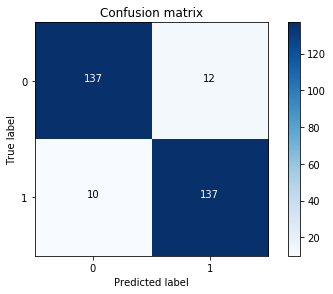

In [7]:
#混淆矩阵
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes, title = 'Confusion matrix', cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center",
                 color = "white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
#处理过的数据集
lr = LogisticRegression(C=best_c, penalty='l1', solver='liblinear')
lr.fit(X_train_undersample.values, y_train_undersample.values.ravel())
y_pred_undersample = lr.predict(X_test_undersample.values)
#计算所需值
cnf_matrix = confusion_matrix(y_test_undersample, y_pred_undersample)
np.set_printoptions(precision=2)
print("召回率：", cnf_matrix[1, 1] / (cnf_matrix[1, 0] + cnf_matrix[1, 1]))
#绘制
class_names = [0, 1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

召回率 in testing dataset： 0.9183673469387755


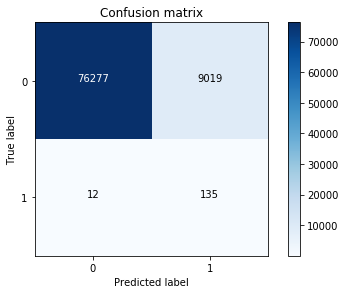

In [8]:
#原始数据集
lr = LogisticRegression(C=best_c, penalty='l1', solver='liblinear')
lr.fit(X_train_undersample.values, y_train_undersample.values.ravel())
y_pred = lr.predict(X_test.values)
#计算所需值
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print("召回率 in testing dataset：", cnf_matrix[1, 1] / (cnf_matrix[1, 0] + cnf_matrix[1, 1]))
#绘制
class_names = [0, 1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

Recall metric in the testing dataset: 1.0
Recall metric in the testing dataset: 1.0
Recall metric in the testing dataset: 1.0
Recall metric in the testing dataset: 0.9795918367346939
Recall metric in the testing dataset: 0.9319727891156463
Recall metric in the testing dataset: 0.8843537414965986
Recall metric in the testing dataset: 0.8231292517006803
Recall metric in the testing dataset: 0.7551020408163265
Recall metric in the testing dataset: 0.5782312925170068


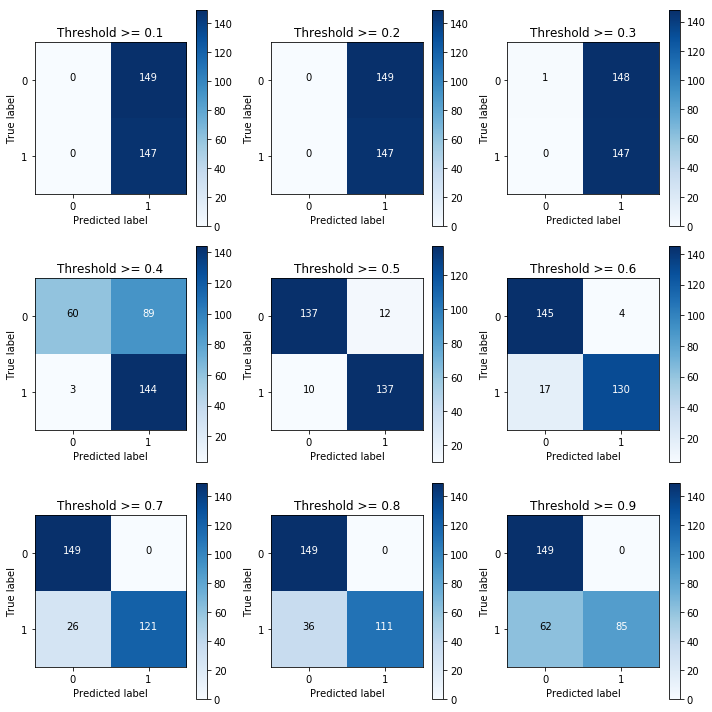

In [9]:
#阈值分类
lr =LogisticRegression(C = 0.01, penalty= 'l1', solver='liblinear')
lr.fit(X_train_undersample.values, y_train_undersample.values.ravel())
y_pred_undersample_proba = lr.predict_proba(X_test_undersample.values)
#指定不同阈值
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
plt.figure(figsize=(10, 10))
j = 1
#混淆矩阵展示
for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i #比较概率和阈值
    plt.subplot(3, 3, j)
    j += 1
    cnf_matrix = confusion_matrix(y_test_undersample, y_test_predictions_high_recall)
    np.set_printoptions(precision=2)
    print("Recall metric in the testing dataset:", 
          cnf_matrix[1, 1,] / (cnf_matrix[1, 0] + cnf_matrix[1, 1]))
    class_names = [0, 1]
    plot_confusion_matrix(cnf_matrix, classes=class_names, title='Threshold >= %s' %i)

In [10]:
#过采样方案
from imblearn.over_sampling import SMOTE
oversampler = SMOTE(random_state=0)
os_features, os_lables = oversampler.fit_resample(X_train, y_train)
os_features = pd.DataFrame(os_features)
os_lables = pd.DataFrame(os_lables)
best_c = priting_Kfold_scores(os_features, os_lables)

----------------------------
正则化惩罚力度： 0.01
----------------------------

Iteration 1 :召回率 =  0.9285714285714286
Iteration 2 :召回率 =  0.912
Iteration 3 :召回率 =  0.9129994941831057
Iteration 4 :召回率 =  0.8972829022573392
Iteration 5 :召回率 =  0.8973959576419159

平均召回率： 0.9096499565307579

----------------------------
正则化惩罚力度： 0.1
----------------------------

Iteration 1 :召回率 =  0.9285714285714286
Iteration 2 :召回率 =  0.92
Iteration 3 :召回率 =  0.9144916540212443
Iteration 4 :召回率 =  0.8985265114876833
Iteration 5 :召回率 =  0.8988782393508109

平均召回率： 0.9120935666862333

----------------------------
正则化惩罚力度： 1
----------------------------

Iteration 1 :召回率 =  0.9285714285714286
Iteration 2 :召回率 =  0.92
Iteration 3 :召回率 =  0.9146433990895296
Iteration 4 :召回率 =  0.8990289798635799
Iteration 5 :召回率 =  0.8989536096071954

平均召回率： 0.9122394834263468

----------------------------
正则化惩罚力度： 10
----------------------------

Iteration 1 :召回率 =  0.9285714285714286
Iteration 2 :召回率 =  0.92
Iteration 3 :召回率 =  0.

recall matric in the testing dataset: 0.9183673469387755


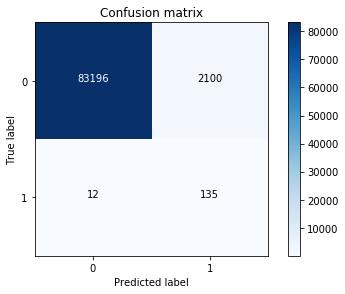

In [13]:
#测试结果的混淆矩阵
lr = LogisticRegression(C = best_c, penalty='l1' ,solver='liblinear')
lr.fit(os_features.values, os_lables.values.ravel())
y_pred = lr.predict(X_test.values)

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print("recall matric in the testing dataset:", cnf_matrix[1, 1] / (cnf_matrix[1, 0] + cnf_matrix[1, 1]))
class_names = [0, 1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()